# 18.06 pset 11

Due Wednesday, November 21 at 10:55am.

## Problem 1

Consider the matrix
$$
A = \begin{pmatrix} 1 & -5 & 6 \\ 3 & -2 & 5 \\ -4 & -4 & 0 \end{pmatrix}
$$
The eigenvalues of $A$ are $0$ and $\frac{-1 \pm i\sqrt{227}}{2}$.

**(a)** The following is a plot of the solution $x(t)$ of
$$
\frac{dx}{dt} = Ax
$$
for an initial condition $x(0) = (1,0,0)$.  Explain your solution in terms of the eigenvalues given above:

* The solution approaches a constant vector because ........
* As it approaches this constant, the solution oscillates with a period = ........

In [3]:
A = [ 1  -5  6
      3  -2  5
     -4  -4  0 ]
a, b = eig(A');

In [6]:
b \ [1,0,0]

3-element Array{Complex{Float64},1}:
  0.178659-0.635771im   
  0.178659+0.635771im   
 -0.593646-2.67819e-17im

In [24]:
-0.593646 * b[:,3]

3-element Array{Complex{Float64},1}:
  0.350877-0.0im
 -0.421052-0.0im
  -0.22807-0.0im

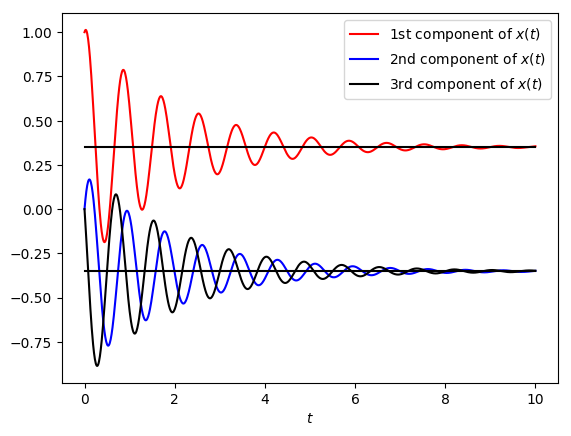

PyObject Text(0.5,24,'$t$')

In [26]:
t = linspace(0, 10, 1000)
using PyPlot
xt = [(expm(A*t)*[1,0,0]) for t in t]
plot(t, [x[1] for x in xt], "r-")
plot(t, [x[2] for x in xt], "b-")
plot(t, [x[3] for x in xt], "k-")
plot(t, [0.350877 for x in xt], "k-")
plot(t, [-0.350877 for x in xt], "k-")
legend([L"1st component of $x(t)$",
        L"2nd component of $x(t)$",
        L"3rd component of $x(t)$"])
xlabel(L"t")

**(b)** Similar to your [solution to problem 4b of pset 10](http://nbviewer.jupyter.org/github/stevengj/1806/blob/master/psets/pset10sol.ipynb), the scalar $v^T x(t)$ is a *constant* (a "conserved" quantity) where the vector $v$ is in the ...... space of $A$, which is ....-dimensional for the matrix $A$ above.  $v$ is also an eigenvector of the matrix .......?

In [9]:
normalize([1,-6/5,-13/20])

3-element Array{Float64,1}:
  0.591054
 -0.709265
 -0.384185

## Problem 2

(Based on Strang, section 6.3, problem 31.)

The **sine of a matrix** can be defined similarly to $e^A$, by copying the [Taylor series for](https://en.wikipedia.org/wiki/Trigonometric_functions#Series_definitions) $\sin t$:

$$
\sin A = A - \frac{A^3}{3!} + \frac{A^5}{5!} - \frac{A^7}{7!} + \cdots .
$$

**(a)** If $Ax = \lambda x$, multiply each term in the series by $x$ to find an eigenvalue of $\sin A$.

**(b)** Explain, using the series, why $\frac{d^2}{dt^2} \sin(At) = -A^2 \sin(At)$.

**(c)** Find a solution of the form $u(t) = \sin(At) w$, where $w$ is some vector, to $\frac{d^2 u}{dt^2} = -A^2 u$, given the initial conditions $u(0) = 0$ and $\left . \frac{du}{dt} \right|_{t=0} = v_0$, assuming $A$ is invertible.

**(d)** If $A = \begin{pmatrix} \pi/2 & \pi/2 \\ \pi/2 & \pi/2 \end{pmatrix}$, it has eigenvectors $v_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and $v_2 = \begin{pmatrix} 1 \\ -1 \end{pmatrix}$.   Find the corresponding eigenvalues, and use them to compute the matrix $\sin A$.

In [20]:
A = [pi/2 pi/2
     pi/2 pi/2]

round((1/(2im))*(expm(im*A)-expm(-im*A)), 5)

2×2 Array{Complex{Float64},2}:
 -0.0-0.0im  0.0+0.0im
  0.0+0.0im  0.0+0.0im

## Problem 3

If $A$ is a real matrix with $A = -A^T$, then

**(a)** Explain why $U = e^A$ is an orthogonal matrix.   Check this in Julia by constructing a random $A$ with `A = rand(4,4); A = A - A'`, exponentiating with `U = expm(A)`, and checking that `U` is orthogonal (up to roundoff errors).

In [21]:
A = rand(4, 4)
A = A - A'

U = expm(A)

4×4 Array{Float64,2}:
  0.930923  -0.237538   0.247217   0.125866
  0.141299   0.845823   0.426817  -0.287132
 -0.307936  -0.125964   0.742595   0.581258
  0.136356   0.460752  -0.45306    0.750901

In [23]:
round(U'U, 5)

4×4 Array{Float64,2}:
  1.0   0.0  -0.0  -0.0
  0.0   1.0  -0.0  -0.0
 -0.0  -0.0   1.0   0.0
 -0.0  -0.0   0.0   1.0

In [32]:
expm(A)' ≈ expm(-A)

true

**(b)** If $x(t)$ satisfies $$\frac{dx}{dt} = Ax$$ then explain why your answer from (a) implies that $\Vert x(t) \Vert = \Vert x(0) \Vert$ for all $t$.

**(c)** The matrix $iA$ is a ............ matrix with eigenvalues that are purely ......., so $A$ must have eigenvalues that are purely ........ and eigenvectors that are .......   Check this with `eigvals(A)` for your matrix from (a).

In [43]:
Λ, X = eig(A);

In [44]:
Λ

4-element Array{Complex{Float64},1}:
         0.0+0.882611im  
         0.0-0.882611im  
 2.21177e-17+0.00568144im
 2.21177e-17-0.00568144im

In [47]:
round(X'X, 5)

4×4 Array{Complex{Float64},2}:
  1.0+0.0im  -0.0+0.0im   0.0+0.0im  -0.0-0.0im
 -0.0-0.0im   1.0+0.0im  -0.0+0.0im   0.0-0.0im
  0.0-0.0im  -0.0-0.0im   1.0+0.0im   0.0-0.0im
 -0.0+0.0im   0.0+0.0im   0.0+0.0im   1.0+0.0im

## Problem 4

You are given the matrix
$$
A = \begin{pmatrix} 7 & 4 & -5 \\ 4 & -2 & 4 \\ -5 & 4 & 7 \end{pmatrix}
$$

**(a)** Two of the eigenvalues of $A$ are 6 and –6.  Find the third eigenvalue.  The eigenvalues must be real because $A$ is .......   Check your answer in Julia using `eigvals(A)`.

In [2]:
A = [ 7  4 -5
      4 -2  4
     -5  4  7 ]

3×3 Array{Int64,2}:
  7   4  -5
  4  -2   4
 -5   4   7

In [3]:
A == A'

true

In [4]:
eigvals(A)

3-element Array{Float64,1}:
 -6.0
  6.0
 12.0

**(b)** Two eigenvectors of $A$ are the column vectors (1,1,1) and (1,-2,1).  Find the third eigenvector.  The eigenvectors must be ....... to one another because $A$ is .......

In [5]:
Λ, X = eig(A);
round(X'X, 5)

3×3 Array{Float64,2}:
  1.0  0.0  -0.0
  0.0  1.0   0.0
 -0.0  0.0   1.0

**(c)** Suppose that $x(t)$ is the solution to $\frac{dx}{dt} = Ax - 12x$ with $x(0) = (1,0,0)$.   After a long time $x(t)$ is approximately parallel to what vector?   Check your answer by computing $x(t) = e^{(A-12I)t} x(0)$ in Julia for a large $t$ using `expm((A-12I)*t)`.

In [6]:
round(expm((A - 12I) * 10000), 5) * [1, 0, 0]

3-element Array{Float64,1}:
  0.5
  0.0
 -0.5

**(d)** Give an exact expression for $x(t)$ from (c).   You should be able to write your answer easily, without doing Gaussian elimination or anything fancy — only a few dot products need to be computed, because the eigenvectors are ..........   Check your answer in Julia using `expm((A-12I)*t)`.

In [7]:
t = 0.15;

In [8]:
(1/3) * exp(-6 * t) * [1, 1, 1] + (1/6) * exp(-18 * t) * [1, -2, 1] + (1/2) * [1, 0, -1]

3-element Array{Float64,1}:
  0.646724
  0.113121
 -0.353276

In [9]:
round(expm((A - 12I) * t), 5)*[1, 0, 0]

3-element Array{Float64,1}:
  0.64672
  0.11312
 -0.35328

**(e)** As $t \to \infty$, the matrix $e^{(A-12I)t}$ approaches what projection matrix $P$?

In [13]:
round(expm((A - 12I) * 1000), 5)^4

3×3 Array{Float64,2}:
  0.5  0.0  -0.5
  0.0  0.0   0.0
 -0.5  0.0   0.5